## **Data retrieval and processing**


In [662]:
import numpy as np
import scipy.io as io
import os

data_path = os.path.join(os.getcwd(),'data')
# loading train and test files
train_5 = io.loadmat(os.path.join(data_path,'training_data_5.mat'))['train_data_5']
train_6 = io.loadmat(os.path.join(data_path,'training_data_6.mat'))['train_data_6']
test_5 = io.loadmat(os.path.join(data_path,'testing_data_5.mat'))['test_data_5']
test_6 = io.loadmat(os.path.join(data_path,'testing_data_6.mat'))['test_data_6']

# coverting each image to a obj-feat datamatrix by flattening each image
train_feat_5 = np.array([i.flatten() for i in train_5])
train_feat_6 = np.array([i.flatten() for i in train_6])
test_feat_5 = np.array([i.flatten() for i in test_5])
test_feat_6 = np.array([i.flatten() for i in test_6])

# getting labelled data
train_lab_5 = np.hstack([train_feat_5, np.full((train_feat_5.shape[0], 1), 5)])
train_lab_6 = np.hstack([train_feat_6, np.full((train_feat_6.shape[0], 1), 6)])
test_lab_5 = np.hstack([test_feat_5, np.full((test_feat_5.shape[0], 1), 5)])
test_lab_6 = np.hstack([test_feat_6, np.full((test_feat_6.shape[0], 1), 6)])

# data with labels
train_lab_data = np.concatenate((train_lab_5, train_lab_6))
test_lab_data = np.concatenate((test_lab_5, test_lab_6))
    

In [663]:
train_lab_data

array([[0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 5.],
       ...,
       [0., 0., 0., ..., 0., 0., 6.],
       [0., 0., 0., ..., 0., 0., 6.],
       [0., 0., 0., ..., 0., 0., 6.]])

In [664]:
# getting grouped data and labels
train_data = train_lab_data[:,:-1]
test_data = test_lab_data[:,:-1]
train_labs = train_lab_data[:,-1]
test_labs = test_lab_data[:,-1]

In [665]:
print(
    'training data shape: ', train_data.shape,
    '\ntesting data shape: ', test_data.shape,
    '\ntraining labels shape: ', train_labs.shape,
    '\ntesting labels shape: ', test_labs.shape
)

training data shape:  (11339, 784) 
testing data shape:  (1850, 784) 
training labels shape:  (11339,) 
testing labels shape:  (1850,)


In [666]:
print('labels sample: ', train_labs)

labels sample:  [5. 5. 5. ... 6. 6. 6.]


## **Task 1**
### Feature normalization

In [667]:
mean_vec = np.mean(train_data, axis=0)
std_vec = np.std(train_data, axis=0)
norm_train = np.where(std_vec != 0, (train_data - mean_vec) / std_vec, 0)

/var/folders/p0/jsns01ks7f73zhhl3nph3qy80000gn/T/ipykernel_18808/1663451352.py:3: RuntimeWarning: invalid value encountered in divide
  norm_train = np.where(std_vec != 0, (train_data - mean_vec) / std_vec, 0)


## **Task 2**
#### PCA on training data

In [668]:
# defining covariance matrix calculation
def cov_matrix(x: np.ndarray) -> np.ndarray:
    
    just_mean = np.mean(x, axis=0)
    print(just_mean.shape)
    centered_matrix = x - just_mean
    
    cov = (centered_matrix.T @ centered_matrix)/(len(x)-1)
    
    return cov

# defining function to select principal components
def pc_selection(eval:np.ndarray, evec:np.ndarray)->(np.ndarray, np.ndarray):
    
    threshold = 0.95
    cum_var_ratio = np.cumsum(eval) / np.sum(eval)
    k = np.argmax(cum_var_ratio >= threshold) + 1
    return eval[:k], evec[:, :k]

In [669]:
#norm_cov_mat = cov_matrix(norm_train)
norm_cov_mat= np.cov(norm_train, rowvar=False)
norm_eigvals, norm_eigvecs= np.linalg.eigh(norm_cov_mat)
    
sorted_indices = np.argsort(norm_eigvals)[::-1]
norm_eigvals = norm_eigvals[sorted_indices]
norm_eigvecs = norm_eigvecs[:, sorted_indices]

## **Task 3**
### PCA dimension reduction

In [670]:
# nomralized data reduced
dimred_train_normdata = norm_train@norm_eigvecs[:,:2]

In [671]:
# original data reduced
cov_mat = cov_matrix(train_data)
eigvals, eigvecs= np.linalg.eigh(cov_mat)
    
sorted_indices = np.argsort(eigvals)[::-1]

eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]
dimred_train_data = train_data@eigvecs[:,:2]

(784,)


plotting to compare data after normalization vs before normalization

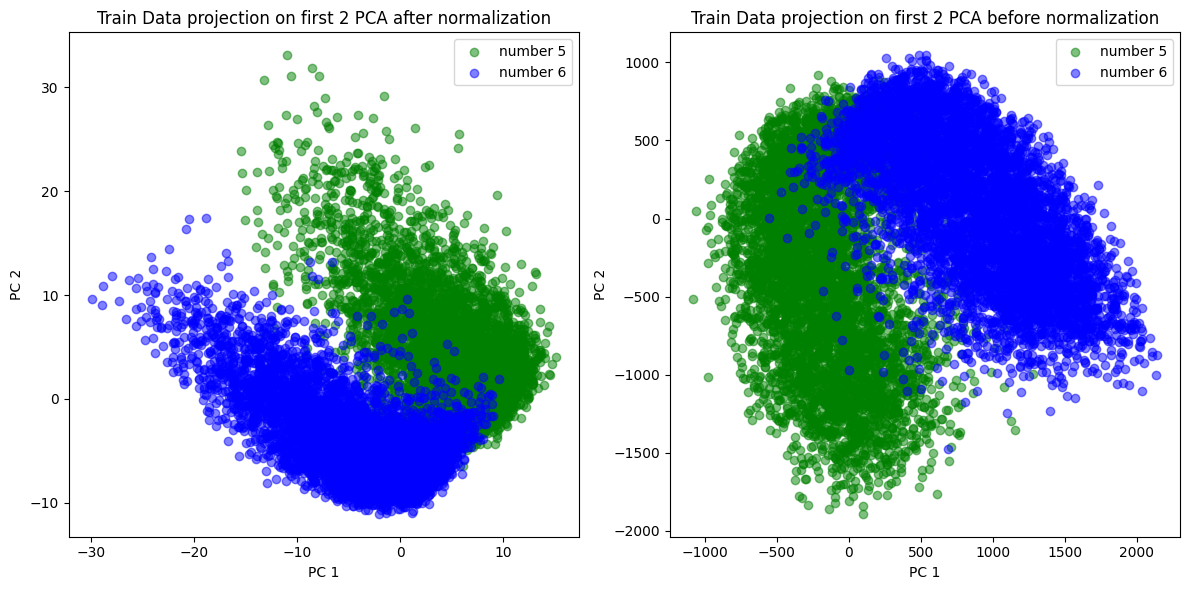

In [672]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plotting PCA data plot with normalization on the first axis (ax1)
ax1.scatter(
    dimred_train_normdata[train_labs==5][:, 0],
    dimred_train_normdata[train_labs==5][:, 1],
    alpha=0.5,
    label='number 5',
    color='green'
)
ax1.scatter(
    dimred_train_normdata[train_labs==6][:, 0],
    dimred_train_normdata[train_labs==6][:, 1],
    alpha=0.5,
    label='number 6',
    color='blue'
)
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
ax1.set_title('Train Data projection on first 2 PCA after normalization')
ax1.legend()

# Checking PCA data plot without normalization on the second axis (ax2)
ax2.scatter(
    dimred_train_data[train_labs==5][:, 0],
    dimred_train_data[train_labs==5][:, 1],
    alpha=0.5,
    label='number 5',
    color='green'
)
ax2.scatter(
    dimred_train_data[train_labs==6][:, 0],
    dimred_train_data[train_labs==6][:, 1],
    alpha=0.5,
    label='number 6',
    color='blue'
)
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_title('Train Data projection on first 2 PCA before normalization')
ax2.legend()

plt.tight_layout()
plt.show()


/var/folders/p0/jsns01ks7f73zhhl3nph3qy80000gn/T/ipykernel_18808/843248110.py:5: RuntimeWarning: divide by zero encountered in divide
  norm_test = np.where(std_vec != 0, (test_data - mean_vec) / std_vec, 0)
/var/folders/p0/jsns01ks7f73zhhl3nph3qy80000gn/T/ipykernel_18808/843248110.py:5: RuntimeWarning: invalid value encountered in divide
  norm_test = np.where(std_vec != 0, (test_data - mean_vec) / std_vec, 0)


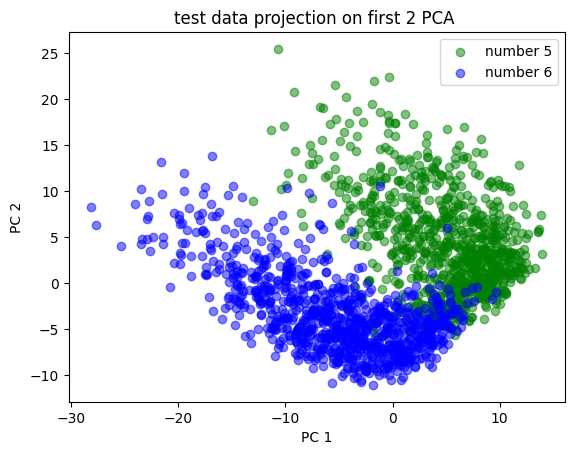

In [673]:
# plotting for reduced dimensions testing data 
# normalizing test data
mean_vec = np.mean(train_data, axis=0)
std_vec = np.std(train_data, axis=0)
norm_test = np.where(std_vec != 0, (test_data - mean_vec) / std_vec, 0)

# dimension reduction on test data
dimred_test_normdata = norm_test@norm_eigvecs[:,:2]

# plotting data points
import matplotlib.pyplot as plt

plt.scatter(
    dimred_test_normdata[test_labs==5][:, 0],
    dimred_test_normdata[test_labs==5][:, 1],
    alpha=0.5,
    label='number 5',
    color='green'
)
plt.scatter(
    dimred_test_normdata[test_labs==6][:, 0],
    dimred_test_normdata[test_labs==6][:, 1],
    alpha=0.5,
    label='number 6',
    color='blue'
)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('test data projection on first 2 PCA ')
plt.legend()

plotting histogram to better explain the data distribution

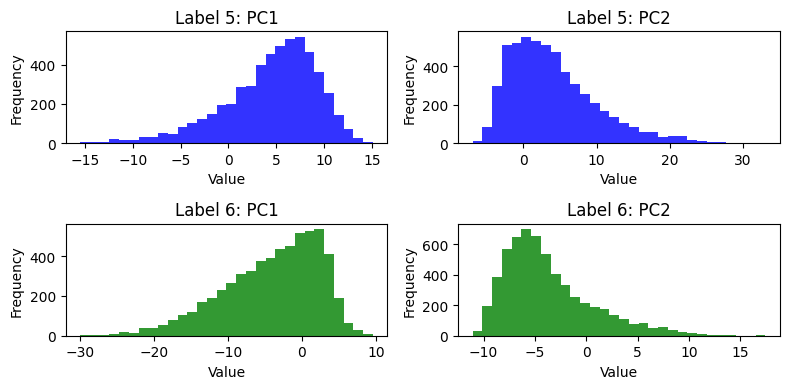

In [674]:
# plot histogram of normalized data vs non-normalized data
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 4))

# Label 5, X Dimension
ax1.hist(dimred_train_normdata[train_labs == 5][:, 0], bins=30, color='blue', alpha=0.8)
ax1.set_title('Label 5: PC1')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Label 5, Y Dimension
ax2.hist(dimred_train_normdata[train_labs == 5][:, 1], bins=30, color='blue', alpha=0.8)
ax2.set_title('Label 5: PC2')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

# Label 6, X Dimension
ax3.hist(dimred_train_normdata[train_labs == 6][:, 0], bins=30, color='green', alpha=0.8)
ax3.set_title('Label 6: PC1')
ax3.set_xlabel('Value')
ax3.set_ylabel('Frequency')

# Label 6, Y Dimension
ax4.hist(dimred_train_normdata[train_labs == 6][:, 1], bins=30, color='green', alpha=0.8)
ax4.set_title('Label 6: PC2')
ax4.set_xlabel('Value')
ax4.set_ylabel('Frequency')

# Adjust layout for better appearance
fig.tight_layout()
plt.show()

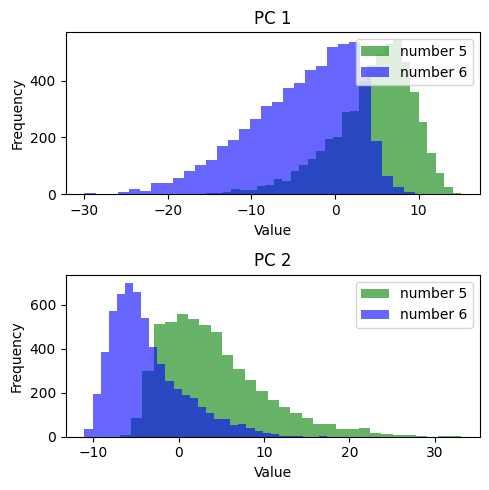

In [675]:
# plot to show the normal
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,5))

# Plot X Dimension
ax1.hist(dimred_train_normdata[train_labs == 5][:, 0], alpha=0.6, color='green', label='number 5', bins=30)
ax1.hist(dimred_train_normdata[train_labs == 6][:, 0], alpha=0.6, color='blue', label='number 6', bins=30)
ax1.set_title('PC 1')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.legend(loc='upper right')

# Plot Y Dimension
ax2.hist(dimred_train_normdata[train_labs == 5][:, 1], alpha=0.6, color='green', label='number 5', bins=30)
ax2.hist(dimred_train_normdata[train_labs == 6][:, 1], alpha=0.6, color='blue', label='number 6', bins=30)
ax2.set_title('PC 2')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## **Task 4**
### Density estimation

Here we calculate the MLE expressions for the mean and variance for the distributions and apply them to  our data

In [676]:
digit5_data = dimred_train_normdata[train_labs==5]
digit6_data = dimred_train_normdata[train_labs==6]

# estimated parameters
digit5_mean, digit5_cov = np.mean(digit5_data, axis=0), cov_matrix(digit5_data)
digit6_mean, digit6_cov = np.mean(digit6_data, axis=0), cov_matrix(digit6_data)

print('digit 5 parameters:\nmean: \n', digit5_mean, '\ncov: \n', digit5_cov)
print('\ndigit 6 parameters:\nmean: \n', digit6_mean, '\ncov: \n', digit6_cov)

(2,)
(2,)
digit 5 parameters:
mean: 
 [4.4531976  4.06950581] 
cov: 
 [[ 23.39752387 -15.13656603]
 [-15.13656603  36.44251424]]

digit 6 parameters:
mean: 
 [-4.07921328 -3.72774434] 
cov: 
 [[ 42.26834766 -17.94685568]
 [-17.94685568  18.33380651]]


## **Task 5**
### Bayesian Decision Theory for optimal classification

In [677]:
# calculating likelihood function for given image vector and class.
from scipy.stats import multivariate_normal

def likelihood_func(x: np.ndarray, mean:np.ndarray, cov:np.ndarray):
    d = x.shape[0]
    
    det = np.linalg.det(cov)
    if det == 0:
        raise ValueError("The covariance matrix is singular")
    
    mvn = multivariate_normal(mean=mean, cov=cov)
    likelihood = mvn.pdf(x)
    return likelihood

In [678]:
digit5_prior = digit6_prior = 0.5
train_pred_labels = []
c=0
for i in dimred_train_normdata:
    # if c==3:
        # break
    
    if likelihood_func(i, digit5_mean, digit5_cov)*digit5_prior>likelihood_func(i, digit6_mean, digit6_cov)*digit6_prior:
        train_pred_labels.append(5)
    else:
        train_pred_labels.append(6)
    
    # c+=1
    # print(i.shape)

train_pred_labels = np.array(train_pred_labels)
train_pred_labels

array([5, 5, 5, ..., 6, 6, 6])

printing accuracy for train data predictions

In [679]:
from sklearn import metrics

print('Training data :\n\n')
print('Accuracy score:\n',metrics.accuracy_score(train_labs, train_pred_labels))
print('\nClassification report:\n',metrics.classification_report(train_labs, train_pred_labels))

Training data :


Accuracy score:
 0.9427639121615663

Classification report:
               precision    recall  f1-score   support

         5.0       0.94      0.94      0.94      5421
         6.0       0.94      0.95      0.95      5918

    accuracy                           0.94     11339
   macro avg       0.94      0.94      0.94     11339
weighted avg       0.94      0.94      0.94     11339



predicting for test data and calculating accuracy

In [680]:
#### preprocessing testing data ######

# normalize test data
mean_vec = np.mean(train_data, axis=0)
std_vec = np.std(train_data, axis=0)
norm_test = np.where(std_vec != 0, (test_data - mean_vec) / std_vec, 0)

# dimension reduction
dimred_test_normdata = norm_test@norm_eigvecs[:,:2]

/var/folders/p0/jsns01ks7f73zhhl3nph3qy80000gn/T/ipykernel_18808/3956759911.py:6: RuntimeWarning: divide by zero encountered in divide
  norm_test = np.where(std_vec != 0, (test_data - mean_vec) / std_vec, 0)
/var/folders/p0/jsns01ks7f73zhhl3nph3qy80000gn/T/ipykernel_18808/3956759911.py:6: RuntimeWarning: invalid value encountered in divide
  norm_test = np.where(std_vec != 0, (test_data - mean_vec) / std_vec, 0)


In [681]:
#####  predicting using test data #####
# digit5_prior = digit6_prior = 0.5
test_pred_labels = []
c=0
for i in dimred_test_normdata:
    # if c==3:
        # break
    
    if likelihood_func(i, digit5_mean, digit5_cov)*digit5_prior>likelihood_func(i, digit6_mean, digit6_cov)*digit6_prior:
        test_pred_labels.append(5)
    else:
        test_pred_labels.append(6)
    
    # c+=1
    # print(i.shape)

test_pred_labels = np.array(test_pred_labels)
test_pred_labels.shape

(1850,)

In [682]:
# accuracy for test data predictions

print('Testing data:\n\n')
print('Accuracy score:\n',metrics.accuracy_score(test_labs, test_pred_labels))
print('\nClassification report:\n',metrics.classification_report(test_labs, test_pred_labels))

Testing data:


Accuracy score:
 0.9383783783783783

Classification report:
               precision    recall  f1-score   support

         5.0       0.93      0.94      0.94       892
         6.0       0.94      0.94      0.94       958

    accuracy                           0.94      1850
   macro avg       0.94      0.94      0.94      1850
weighted avg       0.94      0.94      0.94      1850

